### Импорт необходимых библиотек

In [32]:
import nltk
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.util import ngrams
import pandas as pd


### Загрузка данных

In [21]:
with open('../data/text/songs.txt', 'r') as file:
    songs = file.read()
songs

'Who are you? Who am I? Is it real to touch the sky? Nothing\'s real for the sky,- Said the birds of paradise I\'m afraid, can\'t you see?! Tell me,where you carry me? You will soon realize!- Said the birds of paradise. — uu-u uu-u     Flying home, flying home To the land that you once had known To the peace that once was true For a little girl like you. Flying home, flying home From the world that is made of stone Till your heart is light and free Like it once was meant to be. How I can go ahead, When my eyes are becoming wet? Save your tears! Dry your eyes!- Said the birds of paradise. By the time is passing by Say,how long do we have to fly? Moon will set-sun will rise!- Said the birds of paradise. Flying home, flying home To the land that you once had known To the peace that once was true For a little girl like you. uu-u Flying home, flying home From the world that is made of stone Till your heart is light and free Like it once was meant to be. What the sun!And here`s the light! No

In [20]:
with open('../data/text/poems.txt', 'r') as file:
    poems = file.read()
poems

'Ни времени ни пространства Лишь скорбная воля Да терпеливая вера звериная В то, что сменят нас однажды Новые ангелы Свежие бесы Ещё большие карлики великаны В то, что весна постучится в наши двери В то, что победа встанет на пороге В то, что наши возмутительные боги Вдруг возьмут да и заглянут К нам на огонёк. весна 1994 \nДа, много воды утекло Всеми соками радуги А та, что осталась — так, не вода — Демисезонное оледенение — Даже не скрипнет под колесом Не говоря уже о драгоценном моём сапоге с каблучищем А в небе алеет плывёт раздаётся Пятно неудачи доселе неслыханной Дюже позорной Нежданной Негаданной Так никому и неведомой вовсе. Во весь мой раскидистый взор Дурацкий узор из извилистых вещей,  сиволапых натюрмортов и гнилых овощей Во весь мой разнузданный зрак Эти натюрморты И резвый топорик коварный кровавый Зарытый тайком в каменистой листве. Такое постигло меня однажды Не помню только — на кладбище или в москве А, ну конечно же. 8 ноября, 18 декабря 1995\nНаше дело почётное слов

In [22]:
all_text = songs + poems

### Нормализация текста

In [26]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

<>:1: SyntaxWarning: invalid escape sequence '\]'
<>:1: SyntaxWarning: invalid escape sequence '\]'
C:\Users\nikya\AppData\Local\Temp\ipykernel_25636\1390072589.py:1: SyntaxWarning: invalid escape sequence '\]'
  patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"


In [27]:
normalize_list = lemmatize(all_text)
normalize_txt = " ".join(normalize_list)


### Демонстрация самых используемых слов

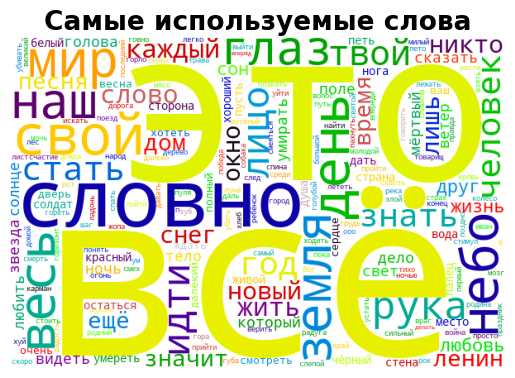

In [28]:
w_c = WordCloud(width=600,height=400,collocations = False,stopwords=stopwords_ru,colormap='nipy_spectral',background_color='white').generate(normalize_txt)

plt.title('Самые используемые слова',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.show()

In [29]:
print("Количество уникальных слов:", len(set(normalize_list)))

Количество уникальных слов: 10611


### Таблица самых популярных сочетаний слов

In [31]:
bigram=ngrams(normalize_list,2)
bigram_dict = dict()
for i in bigram:
    bigram_dict[i] = bigram_dict.get(i,0)+1

trigram = ngrams(normalize_list,3) 
trigram_dict = dict()
for i in trigram:
    trigram_dict[i] = trigram_dict.get(i,0)+1

In [33]:
tri_gram =pd.DataFrame(list(trigram_dict.keys())[:15],columns=['One Of Top 10 Words','Second Word','Third Word'])

def get_prob(sir):
    key = (sir['One Of Top 10 Words'],sir['Second Word'],sir['Third Word'])
    w3 = trigram_dict[key]
    w2 = bigram_dict[(sir['One Of Top 10 Words'],sir['Second Word'])]
    return w3/w2

tri_gram['Probabilty Of Sentence'] = tri_gram.apply(get_prob,axis=1)

tri_gram.style.background_gradient(cmap='coolwarm')

,One Of Top 10 Words,Second Word,Third Word,Probabilty Of Sentence
0,раз,идти,переулок,1.000000
1,идти,переулок,к,1.000000
2,переулок,к,подходить,1.000000
3,к,подходить,двое,1.000000
4,подходить,двое,говорить,1.000000
5,двое,говорить,а,1.000000
6,говорить,а,отдать,1.000000
7,а,отдать,свой,1.000000
8,отдать,свой,сердце,0.166667
9,свой,сердце,хороший,1.000000
